In [ ]:
### See this link as well : 
### https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html
## http://abhay.harpale.net/blog/machine-learning/deep-learning/getting-tensorflow-to-work-with-gpu-nvidia-gtx-1080-on-ubuntu-16-04-lts/

In [18]:
## https://github.com/HackerEarth-Challenges/deep_learning_challenge_one/blob/master/CNN_Starter.ipynb
## you can install any package on this platform like this:
#! pip install opencv-python
#########!pip install h5py
!pip install cPickle

    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\prassha\AppData\Local\Continuum\Anaconda3\lib\tokenize.py", line 452, in open
        buffer = _builtin_open(filename, 'rb')
    FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\prassha\\AppData\\Local\\Temp\\pip-build-d2zc0mow\\cPickle\\setup.py'
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\prassha\AppData\Local\Temp\pip-build-d2zc0mow\cPickle\


In [2]:
## you can install any package on this platform like this:
#! pip install tqdm

In [5]:
## Load Libraries

import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
## Load Libraries
import os
import requests, zipfile, io
%pwd

'C:\\Users\\prassha\\Desktop\\MachineLearning\\Python\\HackerEarth'

In [7]:
# this is the current directory where files will get downloaded
#os.getcwd()
#dir_path = os.path.dirname(os.path.realpath(__file__))
#print(dir_path)
## load files
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [8]:
train.head()

,image_id,label
0,train_1a,rice
1,train_1b,candy
2,train_1c,jam
3,train_1d,coffee
4,train_2a,vinegar


In [9]:
print(train.shape)
print(test.shape)

(3215, 2)
(1732, 1)


In [10]:
num_classes = train['label'].nunique()


In [11]:
## Lets get the actual shape of the images
import matplotlib.image as mpimg
image = mpimg.imread('data/train_img/train_1a.png')
print("Shape:",image.shape)
height, width, depth = image.shape  

Shape: (256, 256, 3)


In [12]:
# lets see the distribution
label_counts = train.label.value_counts()
label_counts

candy          242
chocolate      199
juice          196
coffee         194
tea            184
cereal         181
water          170
jam            157
spices         135
honey          120
chips          118
soda           115
pasta          112
tomatosauce    111
nuts           109
milk           105
cake           105
vinegar        102
rice            97
oil             93
beans           88
sugar           77
fish            71
flour           71
corn            63
Name: label, dtype: int64

In [13]:
# set path to read train and test image
TRAIN_PATH ='data/train_img/'
TEST_PATH = 'data/test_img/'

In [15]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
    ## cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
    ## http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64,64)) # you can resize to  (128,128) or (256,256)
    return img
## function to read images as arrays
def read_image1(img_path):
    #print(img_path)
    img = cv2.imread(img_path)
    return img
img = read_image(TRAIN_PATH+'/train_1a.png')
img.shape
height, width, depth = img.shape 

In [16]:
train_data = []
test_data = []
train_label = train['label'].values
for img in tqdm(train['image_id'].values):
    train_data.append(read_image1(TRAIN_PATH + '{}.png'.format(img)))
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image1(TEST_PATH + '{}.png'.format(img)))

100%|█████████████████████████████████████████████████████████████████████████████| 1732/1732 [00:09<00:00, 179.84it/s]


In [20]:
## normalize the images
x_train = np.array(train_data,np.float32)/255.
x_test = np.array(test_data, np.float32)/255.

In [21]:
# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]


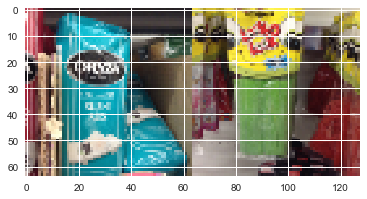

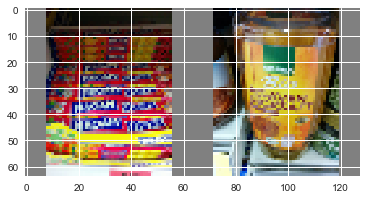

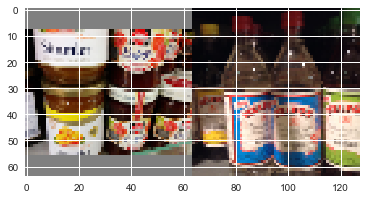

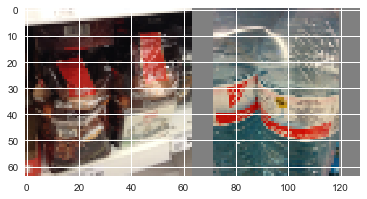

In [16]:
# check some images
def show_images(ix):
    image_train = read_image(TRAIN_PATH + train.image_id[ix] + '.png')
    image_test = read_image(TEST_PATH + test.image_id[ix] + '.png')
    
    pair = np.concatenate((image_train, image_test), axis=1)
    
    plt.figure(figsize = (6,6))
    plt.imshow(pair)
    
# first 4 images in train and test set
for idx in range(4):
    show_images(idx)

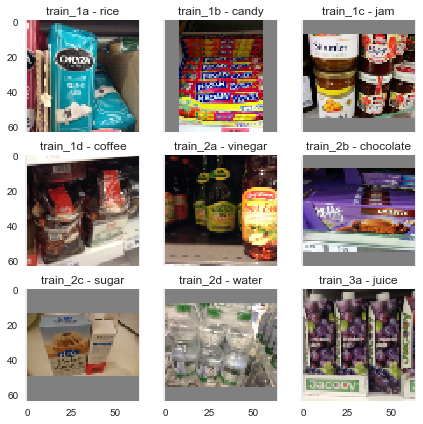

In [17]:
## just images doesn't help, lets see the images with their respective labels
plt.rc('axes', grid=False)

_, axs = plt.subplots(3,3, sharex = 'col', sharey='row', figsize = (7,7))
axs = axs.ravel()

# lets see first 8 images - you can increase i value to see more images
for i, (image_name, label) in enumerate(zip(train.image_id, train.label)):
    if i <= 8:
        img = read_image(TRAIN_PATH + image_name + '.png')
        axs[i].imshow(img)
        axs[i].set_title('{} - {}'.format(image_name, label))
    else:
        break

In [22]:
# lets train our first model, we'll use keras.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.optimizers import SGD

Using TensorFlow backend.


In [28]:
## keras accepts target variable as a ndarray so that we can set one output neuron per class
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
num_classes = np.unique(y_train).shape[0] # there are 10 image classes
print("num_classes:", num_classes)
y_train = np_utils.to_categorical(y_train, num_classes+1) # One-hot encode the labels
##y_train = to_categorical(y_train)
y_train.shape

num_classes: 25


(3215, 26)

In [20]:
batch_size = 10
nb_classes =10
nb_epochs = 3


In [29]:
## neural net architechture
def build_model1():
    model = Sequential()
    model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, shape would be (128,128,3)
    model.add(Convolution2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
    model.add(Convolution2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
    model.add(Convolution2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
    return model


In [37]:
num_classes = num_classes + 1
### Followed these links::
### https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html
### https://medium.com/towards-data-science/neural-networks-part-2-implementing-a-neural-network-function-in-python-using-keras-1ba80aba03df
from keras.layers import Input
from keras.models import Model # basic class for specifying and training a neural network
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 3 # we iterate 200 times over the entire training set
def build_model2():
    #batch_size = 32 # in each iteration, we consider 32 training examples at once
    #num_epochs = 3 # we iterate 200 times over the entire training set
    kernel_size = 3 # we will use 3x3 kernels throughout
    pool_size = 2 # we will use 2x2 pooling throughout
    conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
    conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
    drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
    drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
    hidden_size = 512 # the FC layer will have 512 neurons
    ######################################################################################################
    inp = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
    conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
    conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1)(pool_1)
    # Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
    conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
    conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    drop_2 = Dropout(drop_prob_1)(pool_2)
    # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
    flat = Flatten()(drop_2)
    hidden = Dense(hidden_size, activation='relu')(flat)
    drop_3 = Dropout(drop_prob_2)(hidden)
    out = Dense(num_classes, activation='softmax')(drop_3)

    model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

    model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
                  optimizer='adam', # using the Adam optimiser
                  metrics=['accuracy']) # reporting the accuracy
    return model
    

In [38]:

history = build_model2().fit(x_train, y_train,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1)

ValueError: Error when checking target: expected dense_6 to have shape (None, 25) but got array with shape (3215, 26)

In [27]:
# Compile model
'''
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = SGD(lr=learning_rate, nesterov=False)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
'''

In [28]:
#early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [29]:
#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,verbose=2, validation_split=0.3)

Train on 2250 samples, validate on 965 samples
Epoch 1/3
75s - loss: 3.1647 - acc: 0.0627 - val_loss: 3.1578 - val_acc: 0.0632
Epoch 2/3
76s - loss: 3.1625 - acc: 0.0676 - val_loss: 3.1574 - val_acc: 0.0756
Epoch 3/3
76s - loss: 3.1624 - acc: 0.0756 - val_loss: 3.1571 - val_acc: 0.0756


In [30]:
history.params

{'batch_size': 10,
 'do_validation': True,
 'epochs': 3,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 2250,
 'verbose': 2}

In [31]:
history.history

{'acc': [0.062666667766041226, 0.067555556694666549, 0.075555556946330607],
 'loss': [3.164722582499186, 3.1625291972690159, 3.1624400975969102],
 'val_acc': [0.063212436252307394, 0.075647669675436666, 0.075647669675436666],
 'val_loss': [3.1577649894773652, 3.1573832813322236, 3.1571445131548947]}